<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector).
3. Split X and y into train and test subsets.
4. Preprocess your data:

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix.
   
5. Create your network:
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`.
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four **"configurations"**:

1. Using a `tensorflow` network
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

# Import Library

In [161]:
import pandas as pd
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For visualization

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [163]:
# 1. Load the data
df = pd.read_csv("./datasets/train.csv")

In [164]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
X.shape

(42000, 28, 28, 1)

In [169]:
# Set X,Y
X = df.drop(columns=['label'])  # Features (Image pixel data)
y = df['label']  # Labels (0-9)

In [171]:
# Normalize the pixel values to range [0, 1]
# # This normalization improves computational efficiency and helps standardize 
X = X / 255.0

# Reshape X for CNN (28x28 images with 1 channel)
X = X.values.reshape(-1, 28, 28, 1)

# One-hot encode the labels using `to_categorical`
y = to_categorical(y, num_classes=10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Define the model
# Initial layers
model = Sequential([
   Input(shape=(28, 28, 1)),    # Input shape: 28x28 grayscale images (1 channel)
   Flatten()])                    # Flatten 2D image to 1D array (28*28*1 = 784 values)

# Flatten layer is required before Dense layers because:
# 1. Converts 2D image matrix into 1D array for Dense layer input
# 2. Images: (28, 28, 1) -> Flattened: (784,) --> 28 x 28
# 3. Does not affect batch size or learn parameters

# Add fully-connected (Dense) layers
model.add(Dense(128, activation='relu'))    # Hidden layer 1: 128 nodes, ReLU for non-linearity
model.add(Dense(32, activation='relu'))     # Hidden layer 2: 32 nodes, dimensionality reduction
model.add(Dense(10, activation='softmax'))  # Output layer: 10 nodes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8369 - loss: 0.5726 - val_accuracy: 0.9481 - val_loss: 0.1768
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9580 - loss: 0.1414 - val_accuracy: 0.9549 - val_loss: 0.1410
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.9733 - loss: 0.0932 - val_accuracy: 0.9625 - val_loss: 0.1248
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.9797 - loss: 0.0672 - val_accuracy: 0.9673 - val_loss: 0.1099
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.9839 - loss: 0.0491 - val_accuracy: 0.9648 - val_loss: 0.1197
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9680 - val_loss: 0.1202
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9682 - val_loss: 0.1174
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9913 - loss: 0.0

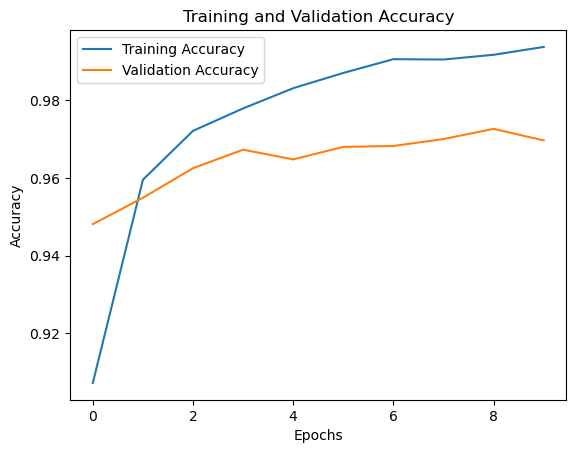

In [175]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [177]:
# Load the test data (test.csv) for prediction
test_data = pd.read_csv("./datasets/test.csv")

In [179]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels (0-9)
predicted_labels = np.argmax(predictions, axis=1)

# Prepare the submission file for Kaggle
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels})

875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


In [181]:
# Preprocess the test data (normalize and reshape)
X_test = test_data.values / 255.0  # Normalize the test data
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape for CNN


# Save the predictions to a CSV file
submission.to_csv('./datasets/submission.csv', index=False)